# E2: Leacock & Chodorow Similarity

$$
Sim_{lch} = -log\frac{length}{2*D}
$$

where $length$ is the length of the shortest path between two concepts using node-counting and $D$ is the maximum depth of the taxonomy.

For the rest of our analyses we will not be adding lexical matching since we know it can provide a minimal boost (around 2% improvement in our dataset).
I want to see what happens without this boost and look only at raw semantic similarity measurements.

#### REFERENCES
1. [Leacock et al. Using Corpus Statistics and WordNet Relations for Sense Identification](./papers/Leacock_1998-leacock_chodorow_algorithm.pdf)

In [1]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import pandas as pd
import numpy as np
import libs.stats as stats
import libs.preprocessing as pp
import libs.data as data
import libs.utils as utils
import exp_libs.wordnet as wn
import spacy
from importlib import reload

In [2]:
df_en = data.load_dataframe("../../../datasets/final/en/asag_v2_en_filter.csv")
display(df_en.head(1))
nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

### Exp. 1: Lang=English, Lexical_Matching=False

In [3]:
res1 = wn.run_entailment_model(nlp_en, df_en, sim_fn=wn.leacock_chodorow_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.03      0.14      0.05        14
        1.0       0.00      0.00      0.00         8
        2.0       0.13      0.28      0.18       234
        3.0       0.07      0.33      0.12       157
        4.0       0.36      0.21      0.26       676
        5.0       0.38      0.11      0.17       921

avg / total       0.31      0.18      0.20      2010

Pearson's R: 0.058438565575557454
Cohen's Kappa: -0.0065054804195587845
MAE: 1.046766169154229
Accuracy: 18.06%
Precision: 31.33%
Recall: 18.06%
F1-Measure: 19.79%


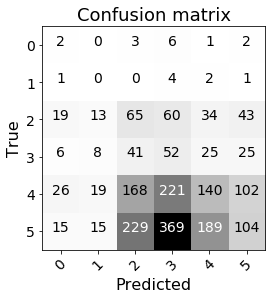

In [4]:
stats.print_all_stats(res1['y_true'], res1['y_pred'])

exp1_data = stats.get_all_stats(res1['y_true'], res1['y_pred'])
# %store exp1_data

stats.plot_confusion_matrix(stats.cm(res1['y_true'], res1['y_pred']), classes=np.arange(6))

In [7]:
## Store Results
data.save('../tmp/e2_exp_01', res1)
data.load('../tmp/e2_exp_01')

## Exp. 2: Lang=English, Lexical_Matching=False, MA=3

In [15]:
res2 = wn.run_entailment_model_k(nlp_en, df_en, sim_fn=wn.leacock_chodorow_similarity, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'],
                                  ma_count=3)

batch: 100 done.
batch: 200 done.
batch: 300 done.
batch: 400 done.
batch: 500 done.
batch: 600 done.
batch: 700 done.
batch: 800 done.
batch: 900 done.
batch: 1000 done.
batch: 1100 done.
batch: 1200 done.
batch: 1300 done.
batch: 1400 done.
batch: 1500 done.
batch: 1600 done.
batch: 1700 done.
batch: 1800 done.
batch: 1900 done.
batch: 2000 done.


             precision    recall  f1-score   support

        0.0       0.05      0.14      0.07        14
        1.0       0.00      0.00      0.00         8
        2.0       0.15      0.15      0.15       234
        3.0       0.09      0.43      0.15       157
        4.0       0.34      0.28      0.31       676
        5.0       0.40      0.17      0.24       921

avg / total       0.32      0.23      0.24      2010

Pearson's R: 0.06756674839762403
Cohen's Kappa: -0.0015239711432410985
MAE: 0.6208955223880597
Accuracy: 22.64%
Precision: 32.35%
Recall: 22.64%
F1-Measure: 24.43%


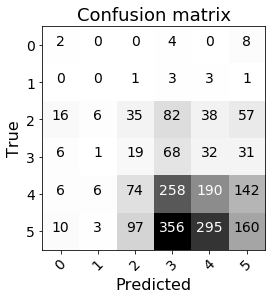

In [16]:
stats.print_all_stats(res2['y_true'], res2['y_pred'])

exp2_data = stats.get_all_stats(res2['y_true'], res2['y_pred'])
# %store exp2_data

stats.plot_confusion_matrix(stats.cm(res2['y_true'], res2['y_pred']), classes=np.arange(6))

In [17]:
## Store Results
data.save('../tmp/e2_exp_02', res2)
data.load('../tmp/e2_exp_02')

{'y_pred': array([2, 3, 4, ..., 0, 3, 2]),
 'y_pred_raw': array([0.48882058, 0.58100686, 0.74585579, ..., 0.        , 0.66666667,
        0.45222952]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}

### Exp. 3: Lang=Spanish, Lexical_Matching=False

In [18]:
df_es = pd.read_csv("../../../datasets/final/es/asag_v2_es_filter.csv", sep='~', index_col=False)
display(df_es.head(1))
nlp_es = spacy.load('es')

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [19]:
res3 = wn.run_entailment_model(nlp_es, df_es, sim_fn=wn.leacock_chodorow_similarity, 
                                  lang='spa',
                                  stop_words=pp.ES_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.


             precision    recall  f1-score   support

        0.0       0.10      0.86      0.18        14
        1.0       0.01      0.38      0.01         8
        2.0       0.13      0.43      0.20       234
        3.0       0.06      0.15      0.08       157
        4.0       0.33      0.06      0.10       676
        5.0       0.42      0.02      0.04       921

avg / total       0.32      0.10      0.08      2010

Pearson's R: 0.099206907509193
Cohen's Kappa: 0.005696305627792775
MAE: 2.0945273631840795
Accuracy: 9.80%
Precision: 32.48%
Recall: 9.80%
F1-Measure: 8.19%


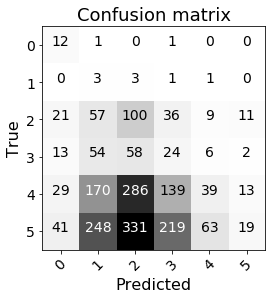

In [20]:
stats.print_all_stats(res3['y_true'], res3['y_pred'])
exp3_data = stats.get_all_stats(res3['y_true'], res3['y_pred'])
# %store exp3_data
stats.plot_confusion_matrix(stats.cm(res3['y_true'], res3['y_pred']), classes=np.arange(6))

In [21]:
## Store Results
data.save('../tmp/e2_exp_03', res3)
data.load('../tmp/e2_exp_03')

{'y_pred': array([2, 2, 3, ..., 0, 3, 2]),
 'y_pred_raw': array([0.35807885, 0.44476375, 0.56706683, ..., 0.        , 0.64285714,
        0.41244459]),
 'y_true': array([4., 5., 4., ..., 2., 5., 2.]),
 'y_true_raw': array([3.5, 5. , 4. , ..., 2.5, 5. , 1.5])}